In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
pd.set_option('display.max_columns',None)
df = pd.read_csv('eda_data.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,average_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel,job_simplifier,seniority,desc_len,num_comp
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,0,47,1,0,0,0,1,data scientist,na,2555,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,MD,0,36,1,0,0,0,0,data scientist,na,4828,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4,FL,1,10,1,0,1,0,1,data scientist,na,3495,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL,WA,1,55,1,0,0,0,0,data scientist,na,3926,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions,NY,1,22,1,0,0,0,1,data scientist,na,2748,3


In [3]:
df.columns
#choose relevent column

# Train test split
#multiple linear regression
#lasso regression
#random forest
# tune model using grid search cv
# test ensembels

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_txt', 'job_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_simplifier',
       'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [7]:
df_models = df[['average_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','num_comp','hourly','employer_provided',
                'job_state','same_state','age','python_yn','spark','aws','excel','job_simplifier','seniority','desc_len']]

In [8]:
## get dummy data
df_dums = pd.get_dummies(df_models)


In [10]:
#train test split
from sklearn.model_selection import train_test_split
X = df_dums.drop('average_salary',axis=1)
y= df_dums.average_salary.values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42) 

In [12]:
#Linear regression using statsmodel
import statsmodels.api as sm 
X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     10.31
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           2.62e-95
Time:                        00:21:58   Log-Likelihood:                -3309.3
No. Observations:                 742   AIC:                             6905.
Df Residuals:                     599   BIC:                             7564.
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                43.7149      6.699      6.525      0.000      30.558      56.872
Rating                                                3.4731      1.932      1.798      0.073      -0.321       7.267
num_comp                                              2.3091      0.866      2.668      0.008       0.609       4.009
hourly                                              -36.7245      9.144     -4.016      0.000     -54.683     -18.766
employer_provided                                    31.0318     11.489      2.701      0.007       8.468      53.596
same_state                                            2.5615      2.609      0.982      0.327      -2.562       7.685
age                                                   0.0369      0.030      1.229      0.220      -0.022       0.096
python_yn                                             7.9757      2.516      3.169      0.002       3.034      12.918
spark                                                -0.5950      2.911     -0.204      0.838      -6.313       5.123
aws                                                   1.1281      2.727      0.414      0.679      -4.227       6.484
excel                                                -0.2903      2.261     -0.128      0.898      -4.731       4.151
desc_len                                             -0.0001      0.001     -0.144      0.885      -0.002       0.001
Size_-1                                              13.5118      8.602      1.571      0.117      -3.381      30.405
Size_1 to 50 employees                                1.3135      6.481      0.203      0.839     -11.414      14.041
Size_10000+ employees                                -3.0830      5.781     -0.533      0.594     -14.436       8.270
Size_1001 to 5000 employees                           5.8872      3.869      1.522      0.129      -1.711      13.485
Size_201 to 500 employees                             2.3692      3.861      0.614      0.540      -5.214       9.952
Size_5001 to 10000 employees                         -3.9619      5.424     -0.730      0.465     -14.614       6.690
Size_501 to 1000 employees                            2.2639      4.047      0.559      0.576      -5.684      10.211
Size_51 to 200 employees                              4.5659      4.412      1.035      0.301      -4.098      13.230
Size_Unknown                                         20.8484     13.947      1.495      0.135      -6.543      48.240
Type of ownership_-1                                 13.5118      8.602      1.571      0.117      -3.381      30.405
Type of ownership_College / University                5.1536     17.686      0.291      0.771     -29.580      39.887
Type of ownersh

In [36]:
#linear regression using sklearn
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train,y_train)

np.mean(cross_val_score(lm,X_train,y_train,scoring='neg_mean_absolute_error',cv = 3))

-104504428.15163662

In [35]:
from sklearn.linear_model import Lasso
lm_l = Lasso(alpha=.15)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train,scoring='neg_mean_absolute_error',cv = 3))

-19.20753476667954

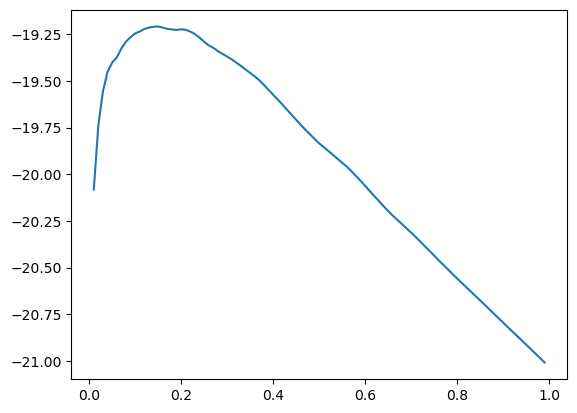

In [22]:
alpha = []
error = []
for i in range(1,100):
    alpha.append(i/100)
    lml=Lasso(alpha=i/100)
    error.append(np.mean(cross_val_score(lml,X_train,y_train,scoring='neg_mean_absolute_error',cv = 3)))

plt.plot(alpha,error)

In [24]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err,columns=['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
14,0.15,-19.207535


In [26]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring='neg_mean_absolute_error',cv = 3))

-14.961823565605291

In [32]:
# Tune using grid search
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10),
              #'criterion':('mse','mae'),
              'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

c:\Users\umair\.conda\envs\General\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\umair\.conda\envs\General\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\umair\.conda\envs\General\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the d

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [33]:
gs.best_score_

-14.839567534850223

In [34]:
gs.best_estimator_

RandomForestRegressor(max_features='auto', n_estimators=290)

In [37]:
#testr ensemble
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)


In [41]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,tpred_lm)
mean_absolute_error(y_test,tpred_lml)
mean_absolute_error(y_test,tpred_rf)

10.886206896551723